In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Childhood Respiratory Disease

Keywords: polynomial regression, multiple regression.

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.


In [3]:
# Read the csv file into a pandas DataFrame

coralBleaching = pd.read_csv('CoralBleaching.csv')
coralBleaching.head()

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,MONTH,YEAR,DEPTH,...,RECOVERY_CODE,RECOVERY,SURVEY_TYPE,SURVEY_AREA,WATER_TEMPERATURE,OTHER_FACTORS,REMARKS,SOURCE,REFERENCE_CODE,COUNTRY_CODE
0,7067,NaN,NaN,France,"Hermitage, Reunion",-21.22,55.22,4.0,2008,6,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
1,7068,NaN,NaN,France,"Saint Gilles, Reunion",-21.05,55.23,7.0,2008,6.5,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
2,7069,NaN,NaN,France,"Saint-Leu, Reunion",-21.16,55.28,2.0,2008,6,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert . Site...",NaN,FRA
3,4024,NaN,NaN,France,SE France,43.00,5.00,8.0,1999,NaN,...,NaN,NaN,Diving,100 km,22-23.9 °C,NaN,Bleaching of Cladocora caespitosa and Oculina ...,Martin Pêcheux (martin-pecheux@wanadoo.fr) per...,NaN,FRA
4,7049,NaN,NaN,Macau,"Koh Tao, Surat Thani",10.12,99.81,7.0,2009,4,...,NaN,NaN,Reef Check Protocol,NaN,"Air temp 28 Deg C, Water temp 29 Deg C",NaN,0% of recorded recently killed coral on substr...,Reef check submitted by Suchana Apple Chavanic...,NaN,MAC


In [4]:
for col in coralBleaching.columns: 
    print(col) 

ID
REGION
SUBREGION
COUNTRY
LOCATION
LAT
LON
MONTH
YEAR
DEPTH
SEVERITY_CODE
BLEACHING_SEVERITY
CORAL_FAMILY
CORAL_SPECIES
PERCENTAGE_AFFECTED
BLEACHING_DURATION
MORTALITY_CODE
MORTALITY
RECOVERY_CODE
RECOVERY
SURVEY_TYPE
SURVEY_AREA
WATER_TEMPERATURE
OTHER_FACTORS
REMARKS
SOURCE
REFERENCE_CODE
COUNTRY_CODE


In [5]:
coralReduced = coralBleaching[["ID","REGION","SUBREGION","COUNTRY","LAT","LON","YEAR","DEPTH","SEVERITY_CODE","BLEACHING_SEVERITY","CORAL_SPECIES","PERCENTAGE_AFFECTED","MORTALITY_CODE","RECOVERY_CODE","COUNTRY_CODE"]]
coralReduced.head()

,ID,REGION,SUBREGION,COUNTRY,LAT,LON,YEAR,DEPTH,SEVERITY_CODE,BLEACHING_SEVERITY,CORAL_SPECIES,PERCENTAGE_AFFECTED,MORTALITY_CODE,RECOVERY_CODE,COUNTRY_CODE
0,7067,NaN,NaN,France,-21.22,55.22,2008,6,0,No Bleaching,NaN,NaN,NaN,NaN,FRA
1,7068,NaN,NaN,France,-21.05,55.23,2008,6.5,0,No Bleaching,NaN,NaN,NaN,NaN,FRA
2,7069,NaN,NaN,France,-21.16,55.28,2008,6,0,No Bleaching,NaN,NaN,NaN,NaN,FRA
3,4024,NaN,NaN,France,43.00,5.00,1999,NaN,-1,Severity Unknown,"Cladocora caespitosa, Oculina patagonensis",NaN,NaN,NaN,FRA
4,7049,NaN,NaN,Macau,10.12,99.81,2009,4,0,No Bleaching,NaN,NaN,NaN,NaN,MAC


In [7]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
coralReducedBinary = pd.get_dummies(coralReduced)
coralReducedBinary.to_csv("coralReducedBinary1.csv", index=False)
coralReducedBinary.head()
### END SOLUTION

,ID,LAT,LON,YEAR,SEVERITY_CODE,MORTALITY_CODE,RECOVERY_CODE,REGION_Africa,REGION_Americas,REGION_Asia,...,COUNTRY_CODE_VEN,COUNTRY_CODE_VIR,COUNTRY_CODE_VIR_CRO,COUNTRY_CODE_VIR_JOH,COUNTRY_CODE_VNM,COUNTRY_CODE_VUT,COUNTRY_CODE_WSM,COUNTRY_CODE_YEM,COUNTRY_CODE_YEM_ADE,COUNTRY_CODE_ZAF
0,7067,-21.22,55.22,2008,0,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7068,-21.05,55.23,2008,0,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7069,-21.16,55.28,2008,0,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4024,43.00,5.00,1999,-1,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7049,10.12,99.81,2009,0,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = coralReducedBinary[["COUNTRY_American Samoa","COUNTRY_Aruba","COUNTRY_Australia","COUNTRY_Australia (North)","COUNTRY_Australia (West)","COUNTRY_Bahamas","COUNTRY_Bahrain","COUNTRY_Baker and Howland Islands","COUNTRY_Barbados","COUNTRY_Belize","COUNTRY_Bermuda","COUNTRY_Borneo","COUNTRY_Brazil","COUNTRY_Cambodia","COUNTRY_Cayman Islands","COUNTRY_Chagos Archipelago (UK)","COUNTRY_Chile","COUNTRY_Colombia","COUNTRY_Comoros","COUNTRY_Cook Islands","COUNTRY_Costa Rica","COUNTRY_Cuba","COUNTRY_Dominica","COUNTRY_Dominican Republic","COUNTRY_Ecuador","COUNTRY_Egypt","COUNTRY_Eritrea","COUNTRY_Federated States of Micronesia","COUNTRY_Fiji","COUNTRY_Florida (USA)","COUNTRY_France","COUNTRY_French Polynesia","COUNTRY_Grenada","COUNTRY_Guadeloupe","COUNTRY_Guam","COUNTRY_Haiti","COUNTRY_Hawaiian Islands (USA)","COUNTRY_Honduras","COUNTRY_India","COUNTRY_Indonesia","COUNTRY_Iran","COUNTRY_Israel","COUNTRY_Jamaica","COUNTRY_Japan","COUNTRY_Kenya","COUNTRY_Kiribati","COUNTRY_Kuwait","COUNTRY_Macau","COUNTRY_Madagascar","COUNTRY_Malaysia","COUNTRY_Maldives","COUNTRY_Marshall Islands","COUNTRY_Martinique","COUNTRY_Mauritania","COUNTRY_Mauritius","COUNTRY_Mayotte","COUNTRY_Mexico","COUNTRY_Mexico (Caribbean)","COUNTRY_Mexico (Pacific)","COUNTRY_Minor Outlying Islands","COUNTRY_Mozambique","COUNTRY_Netherlands Antilles","COUNTRY_New Caledonia","COUNTRY_New Zealand","COUNTRY_Nicaragua","COUNTRY_Northern Mariana Islands","COUNTRY_Oman","COUNTRY_Palau","COUNTRY_Palmyra Atoll","COUNTRY_Panama","COUNTRY_Panama (Atlantic)","COUNTRY_Papua New Guinea","COUNTRY_Peninsular","COUNTRY_Philippines","COUNTRY_Puerto Rico","COUNTRY_Qatar","COUNTRY_Samoa","COUNTRY_Saudi Arabia","COUNTRY_Seychelles","COUNTRY_Singapore","COUNTRY_Solomon Islands","COUNTRY_Somalia","COUNTRY_South Africa","COUNTRY_Sri Lanka","COUNTRY_St. Croix","COUNTRY_St. Helena","COUNTRY_St. Johnson & Thomas","COUNTRY_St. Kitts and Nevis","COUNTRY_St. Lucia","COUNTRY_St. Vincent and the Grenadines","COUNTRY_Sulawesi","COUNTRY_Taiwan","COUNTRY_Tanzania","COUNTRY_Thailand","COUNTRY_Timor-Leste","COUNTRY_Tonga","COUNTRY_Torres Strait & Great Barrier Reef","COUNTRY_Trinidad and Tobago","COUNTRY_Turks and Caicos Islands","COUNTRY_Tuvalu","COUNTRY_United Arab Emirates","COUNTRY_United Kingdom","COUNTRY_United States","COUNTRY_Vanuatu","COUNTRY_Venezuela","COUNTRY_Vietnam","COUNTRY_Virgin Islands (British)","COUNTRY_Virgin Islands (U.S.)","COUNTRY_Yemen","COUNTRY_Yemen (Gulf of Aden)","COUNTRY_Zanzibar Islands"]]
#y = coralReducedBinary["SEVERITY_CODE"].values.reshape(-1, 1)
#print(X.shape, y.shape)
### END SOLUTION

In [10]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = coralReducedBinary[["LAT","LON","SEVERITY_CODE"]]
#y = coralReducedBinary["YEAR"].values.reshape(-1, 1)
#print(X.shape, y.shape)
### END SOLUTION

In [11]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#X = coralReducedBinary[["LAT","LON","SEVERITY_CODE","REGION_Africa","REGION_Americas","REGION_Asia","REGION_Australia","REGION_Middle East","REGION_Pacific"]]
#y = coralReducedBinary["YEAR"].values.reshape(-1, 1)
#print(X.shape, y.shape)
### END SOLUTION

In [12]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = coralReducedBinary[["LAT","LON","SEVERITY_CODE","REGION_Africa","REGION_Americas","REGION_Asia","REGION_Australia","REGION_Middle East","REGION_Pacific","BLEACHING_SEVERITY_HIGH","BLEACHING_SEVERITY_Low","BLEACHING_SEVERITY_Medium","BLEACHING_SEVERITY_No Bleaching","BLEACHING_SEVERITY_Severity Unknown"]]
y = coralReducedBinary["YEAR"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(6190, 14) (6190, 1)


In [13]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [16]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

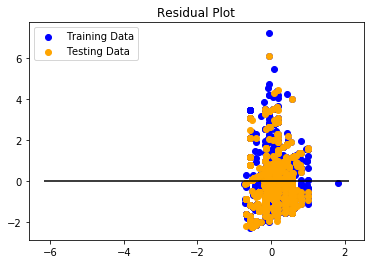

In [17]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [18]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8324691522766763, R2: 0.12771602514891622


In [19]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8323965564389522, R2: 0.12779209305571437


In [20]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8324688190850879, R2: 0.1277163742761871


In [21]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8323017113904625, R2: 0.12789147429484526


In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
classifier.fit(X_train, y_train)

/Users/nancycampos/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nancycampos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.37139164153382165
Testing Data Score: 0.3611111111111111


In [29]:
new_data = np.array([[6190, 14]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

TypeError: '(slice(None, None, None), 0)' is an invalid key